### Importing necessary library

In [1]:
import pandas as pd
import numpy as np

import datetime

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

### Reading the training and testing dataset files

In [2]:
rent_df = pd.read_csv('../Data/canada_rent_clean_max5k.csv')
#rent_df = pd.read_csv('../Data/canada_rent_featEng.csv')

# X_train = pd.read_csv('../Data/X_Training_Alberta.csv')
# X_test = pd.read_csv('../Data/X_Testing_Alberta.csv')

# y_train = pd.read_csv('../Data/y_Training_Alberta.csv')
# y_test = pd.read_csv('../Data/y_Testing_Alberta.csv')

### Features to keep

In [3]:
# feat2keep = ['longitude', 'beds', 'baths', 'sq_feet' ,'lease_term_6 months',
#  'lease_term_Negotiable' ,'lease_term_Short Term', 'type_Basement',
#  'type_Condo Unit' ,'type_House','type_Room For Rent', 'type_Townhouse',
#  'smoking_Smoking Allowed' ,'province_British Columbia', 'province_Manitoba',
#  'province_Newfoundland and Labrador' ,'province_Nova Scotia',
#  'province_Ontario', 'province_Quebec', 'province_Saskatchewan']

# feat2keep = ['longitude', 'beds', 'baths', 'sq_feet', 'lease_term_6 months',
#  'lease_term_Short Term' ,'type_Basement' ,'type_House' ,'type_Room For Rent',
#  'province_British Columbia' ,'province_Manitoba',
#  'province_Newfoundland and Labrador' ,'province_Ontario', 'province_Quebec',
#  'province_Saskatchewan']

# feat2keep = ['longitude' ,'sq_feet', 'type_Basement' ,'type_Room For Rent',
#  'province_Manitoba']
# feat2keep = ['baths','beds','type_House','province_Ontario'	,'longitude',
# 'sq_feet','province_Manitoba','province_Saskatchewan',
# 'type_Basement','type_Room For Rent','latitude', 'lease_term_6 months',
#             'lease_term_Short Term', 'province_Northwest Territories',
#             'cats','dogs']


feat2keep = ['baths','beds','type_House','province_Ontario'	,'longitude',
'sq_feet','province_Saskatchewan',
'type_Basement','type_Room For Rent','latitude', ]


#feat2keep = ['beds','sq_feet', 'type_Basement', 'type_House', 'type_Room For Rent',
# 'city_Blackfalds', 'city_Bonnyville', 'city_Camrose', 'city_Edmonton',
# 'city_Grande Prairie', 'city_Lethbridge', 'city_Medicine Hat',
# 'city_Sherwood Park', 'city_St. Albert', 'city_Sylvan Lake', 'type_Basement', 'type_Condo Unit', 'type_House', 'lease_term_Negotiable','baths']
#['beds', 'baths', 'sq_feet', 'cats', 'dogs', 'lease_term_Negotiable',
# 'type_Basement', 'type_Condo Unit', 'type_House', 'type_Room For Rent', 'city']

# feat2keep = ['baths','beds','type_House','longitude',
# 'sq_feet', 'type_Basement','type_Room For Rent','latitude' ]

### Keep only selected features from dataset

In [4]:
# Separate independent variable from dependent variable
X = rent_df[feat2keep]
y = rent_df['price']

### Split dataset into training and testing set

In [5]:
# Split data into training/testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

<Figure size 2000x2000 with 0 Axes>

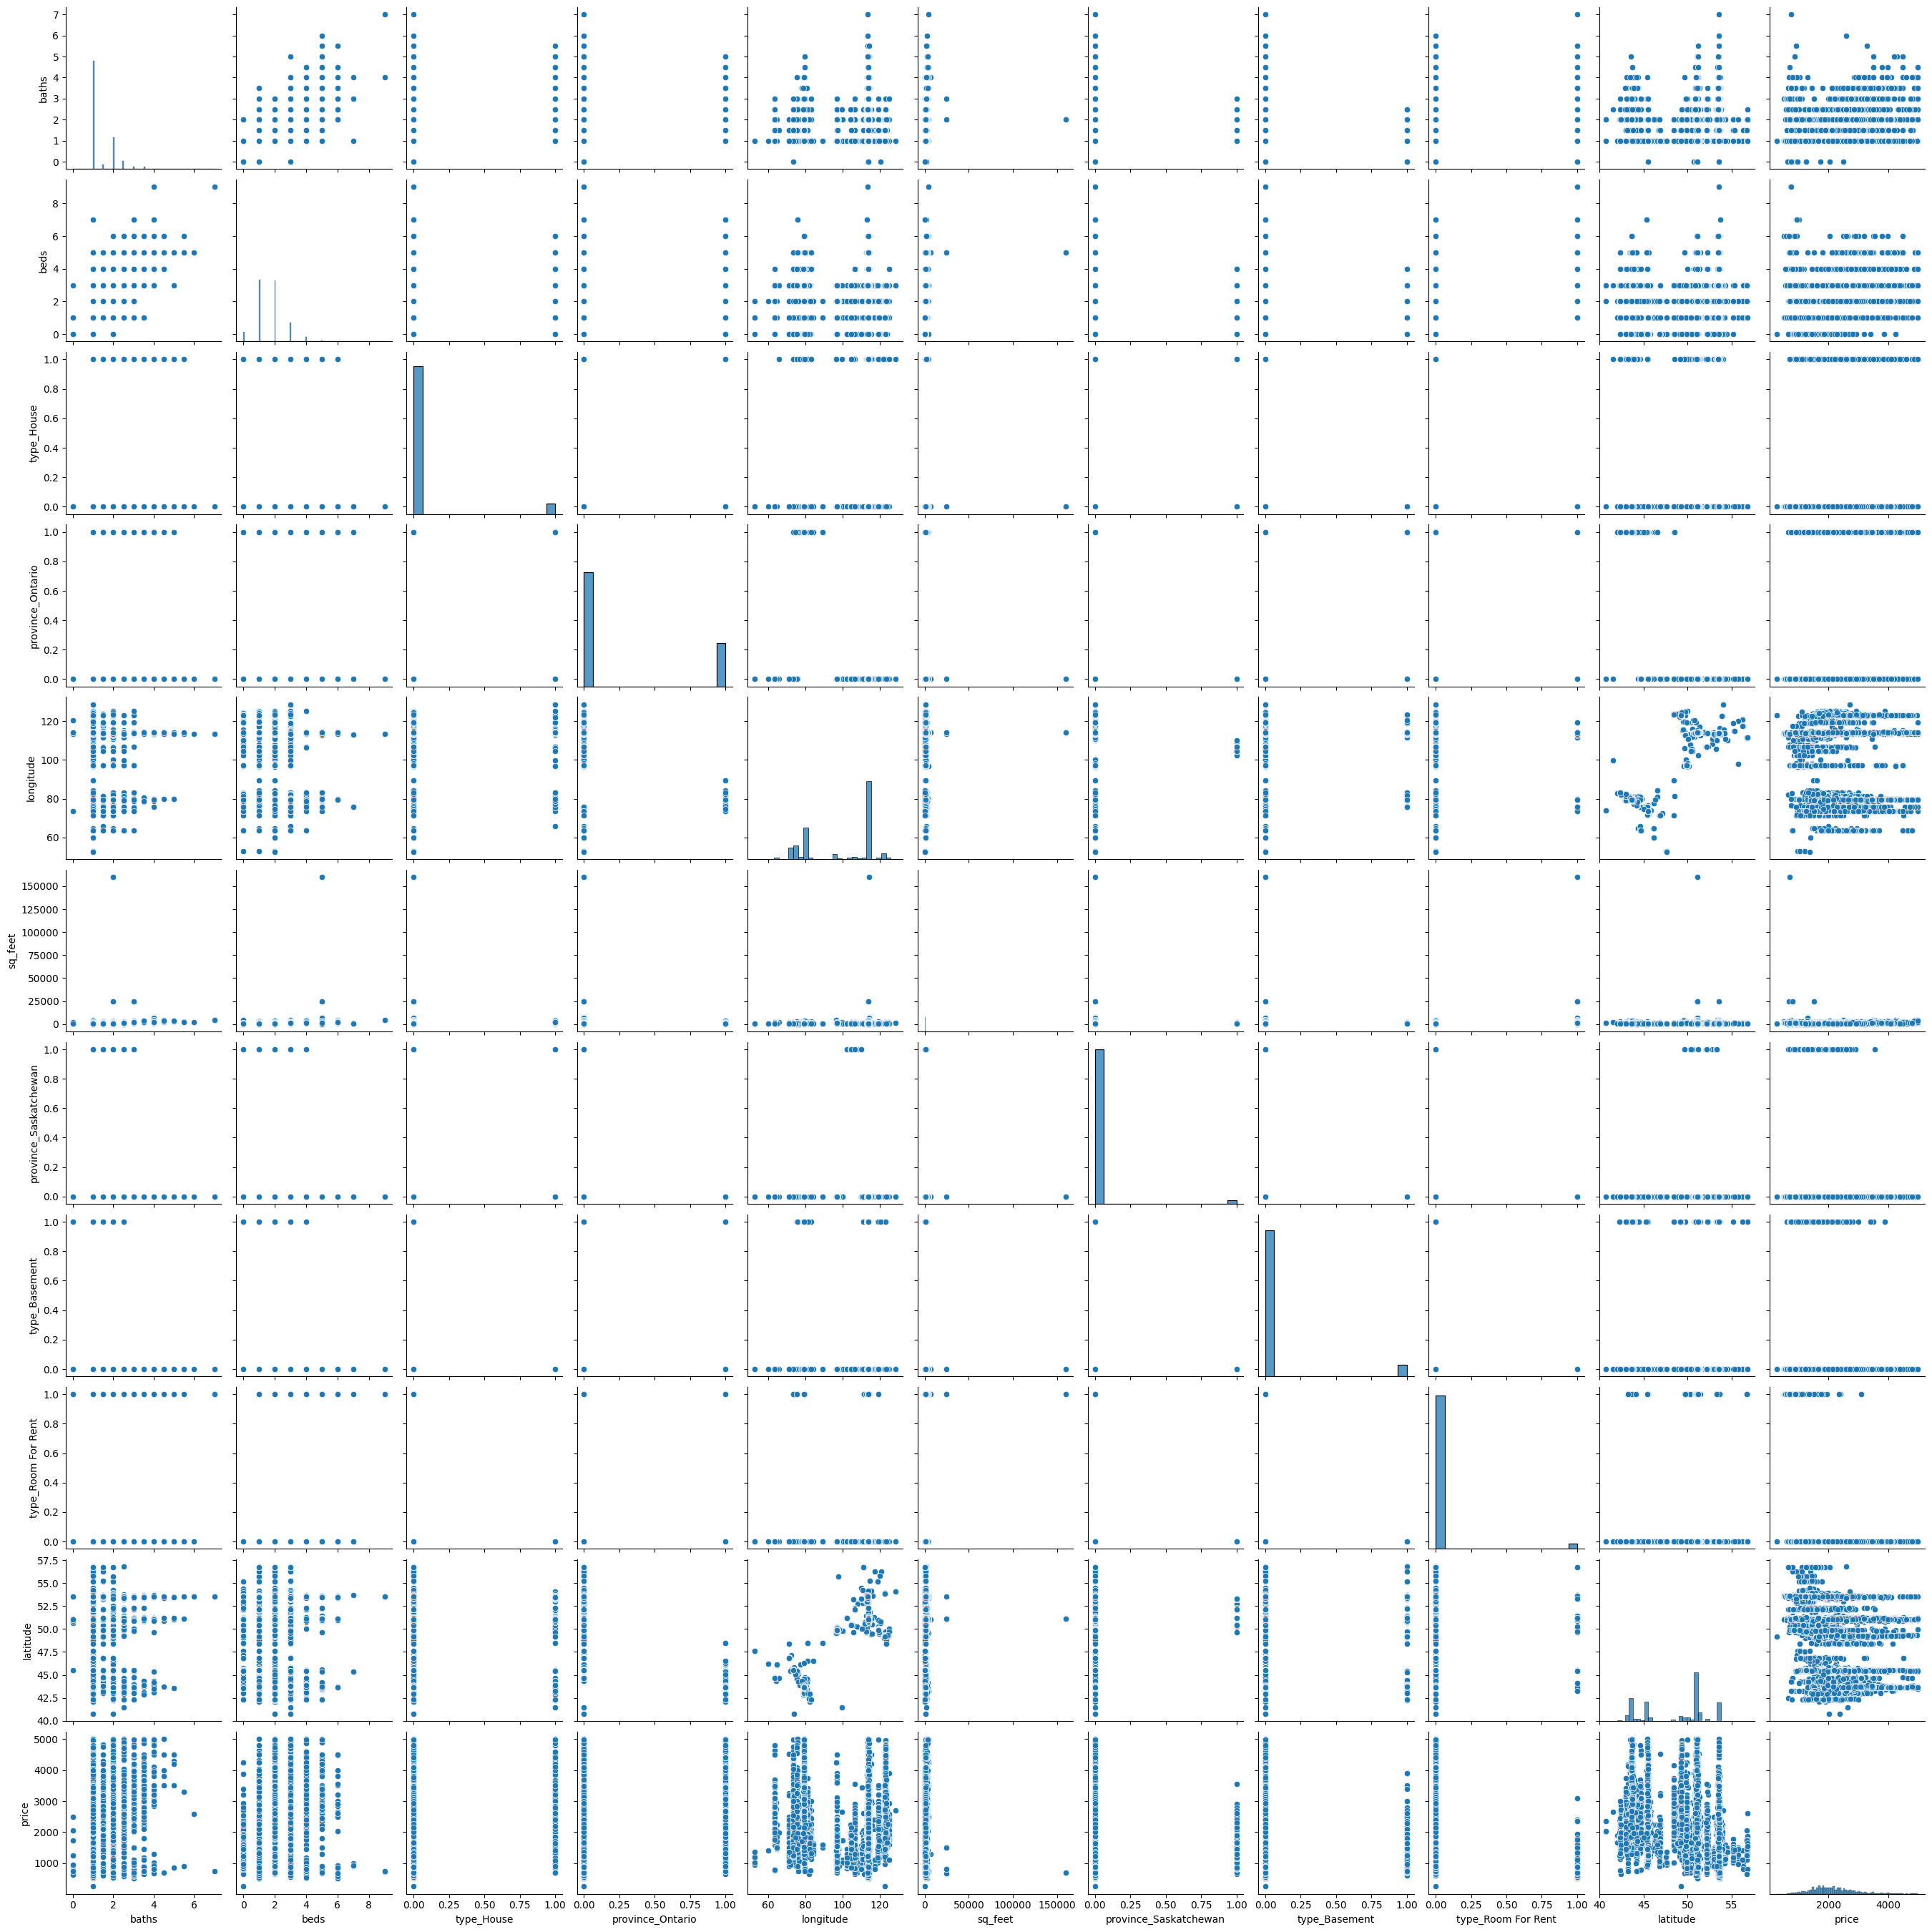

In [6]:
# Investigate the correlation to determine most valuable columns for prediction
# Create plot and adjust its size
plt.figure( figsize=(20, 20))

# Create paired plot
ax = sns.pairplot(X_train.join(y_train))

# Saving the plot t be able to zoom in
plt.savefig('../Graph/SLR_paiplot_train.png')

# Show plot
plt.show()

### Data scaling

In [7]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit-transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform only on test data
X_test_scaled = scaler.transform(X_test)

### Train the model on training dataset

In [8]:
# Create instance of model
slr_model = LinearRegression()

# Train model
slr_model.fit(X_train_scaled, y_train)

LinearRegression()

### Forecast on testing dataset

In [9]:
# Obtain predicted y values
y_pred = slr_model.predict(X_test_scaled)

### Evaluate the model

In [10]:
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f'The Mean Absolute Error = {mae:.0f}\n\
The Mean Square Error = {mse:.0f}\n\
The Root Mean Square Error = {rmse:.0f}\n\
The R2 scores = {r2:.0f}')

The Mean Absolute Error = 341
The Mean Square Error = 226713
The Root Mean Square Error = 476
The R2 scores = 1



| Regression Method   | Mean Absolute Error | Mean Square Error    | Root Mean Square Error | R2 scores   |
| ------------------- | ------------------- | -------------------- | ---------------------- | ----------- |
| Linear              | 391                | 375721             | 613                   | 1           |
| Polynomial          | 2596                | 19449989             | 4410                   | 1           |

The errors (Mean Absolute, Mean Square and Root Mean Square) are all lower for the polynomial regression model than the linear regression model. A lower error is an indication that the prediction values are closer to the true value. 

** Conclusion ** </br>
The model built from a polynomial regression with an order of 2 performs better than the linear regression model, since its predicted values are closer to the true values.


### Look at the coefficients

In [11]:
coeff_df = pd.DataFrame(slr_model.coef_.reshape(-1,1),X_test.columns,columns=['Coefficient'])
coeff_df.transpose()

,baths,beds,type_House,province_Ontario,longitude,sq_feet,province_Saskatchewan,type_Basement,type_Room For Rent,latitude
Coefficient,259.127421,178.720798,9.341573,0.878661,303.450059,-5.530888,-61.554367,-95.899189,-220.416542,-530.312752


### Plot the residuals

Text(0.5, 1.0, 'QQ plot')

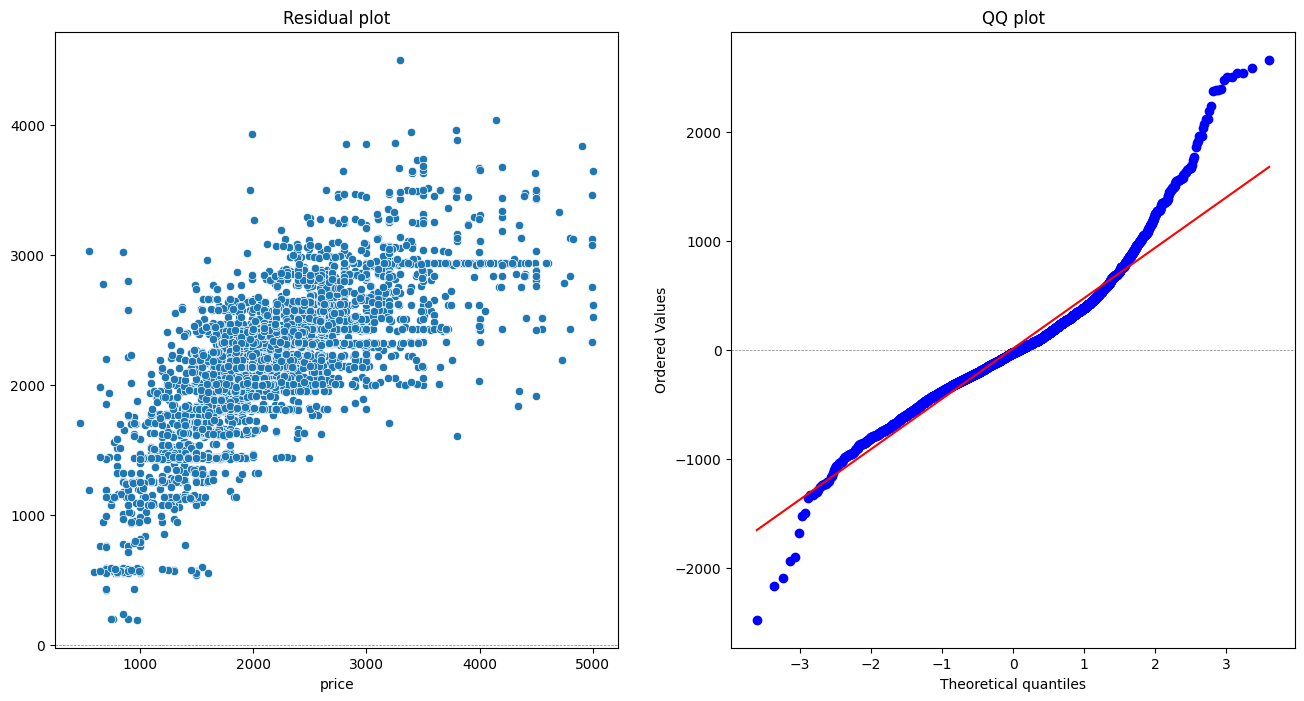

In [12]:
# Residual plot

# Create subplots and adjust their size
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (8*2, 8))

# Add scatter plot
sns.scatterplot(x=y_test, y=y_pred, zorder=3, ax = ax1)

# Add legend to ax1
ax1.set_title('Residual plot')

# Add grid y-axis line at 0
ax1.axhline(0, linestyle='--', color='gray', zorder=0, linewidth=0.5)

# Add QQ plot
stats.probplot(y_test-y_pred, dist="norm", plot=ax2);

# Add grid y-axis line at 0
ax2.axhline(0, linestyle='--', color='gray', zorder=0, linewidth=0.5)

# Add legend to ax2
ax2.set_title('QQ plot')

In [13]:
X_test

,baths,beds,type_House,province_Ontario,longitude,sq_feet,province_Saskatchewan,type_Basement,type_Room For Rent,latitude
20220,2.0,3,0.0,0.0,73.615171,1108,0.0,0.0,0.0,45.562382
12741,1.0,1,0.0,0.0,97.149497,656,0.0,0.0,0.0,49.880550
2055,1.0,1,0.0,0.0,114.092782,723,0.0,0.0,0.0,51.042521
10033,1.0,2,0.0,0.0,114.068009,874,0.0,0.0,0.0,50.920408
4933,2.0,2,0.0,0.0,113.419092,924,0.0,0.0,0.0,53.622456
...,...,...,...,...,...,...,...,...,...,...
17444,1.0,1,0.0,1.0,79.430492,658,0.0,0.0,0.0,43.724705
13764,1.0,2,0.0,1.0,79.368796,911,0.0,0.0,0.0,44.904988
19476,1.0,1,0.0,0.0,75.783002,605,0.0,0.0,0.0,45.437615
838,2.0,2,0.0,0.0,114.073360,1042,0.0,0.0,0.0,50.978130
